In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
df = pd.read_excel("data/gazete.xlsx")
df.head()

,kategori,icerik
0,magazin,SAPIĞIN BİLE GURURSUZU BANA DENK GELDİ Ece Erk...
1,magazin,"Çekim dönüşü Kenan İmirzalıoğlu, geçtiğimiz ak..."
2,magazin,Paylaştığı fotoğraf Twitter'da olay oldu! Vict...
3,magazin,"DANIŞTAY, 5 DAKİKA SEVİŞMEYİ UZUN BULDU Danışt..."
4,magazin,Yağmur ve Emre dudak dudağa Kanal D'nin yeni y...


In [4]:
import nltk
import re
stop_word_list = nltk.corpus.stopwords.words('turkish')

docs = df['icerik']
docs = docs.map(lambda x: re.sub(r"[-()\"#/@;:<>{}+=~|.!?,]", '', x))
docs = docs.map(lambda x: x.lower())
docs = docs.map(lambda x: x.strip())

def token(values):
    filtered_words = [word for word in values.split() if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc


docs = docs.map(lambda x: token(x))
df['icerik'] = docs
print(df.tail(20))


       kategori                                             icerik
5557  teknoloji  assassin's creed 4 black flag geliyor popüler ...
5558  teknoloji  doodle 4 google logo yarışması başlıyor google...
5559  teknoloji  robot savaşları mümkün günümüzde insansız sava...
5560  teknoloji  chrome yenilendi chrome'un son final sürümü ya...
5561  teknoloji  dünyanın yeni korkusu siber savaş hafta önce m...
5562  teknoloji  osmanlı'nın savaşları oyun oluyor osmanlı i̇mp...
5563  teknoloji  i̇nsan beyninin ayrıntılı görüntüleri yayınlan...
5564  teknoloji  merkel cebit'te selocan'ın elini sıktı turkcel...
5565  teknoloji  meclis cep telefonuna sığdırıldı milletvekille...
5566  teknoloji  binlerce hesap resetlendi twitter güvenlik ned...
5567  teknoloji  photoshop'un yeni mobil sürümü yayında yeni uy...
5568  teknoloji  i̇ki kuyruklu yıldız aynı karede gökyüzünde sı...
5569  teknoloji  galaxy s4'e gözle kontrol geliyor bir samsung ...
5570  teknoloji  apple iphone hangi isimleri düşünmüş iphone p

In [5]:
df["kategori_id"] = df["kategori"].factorize()[0]
df['kategori_id'][0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: kategori_id, dtype: int64

In [6]:
kategori_id_df = df[['kategori', 'kategori_id']].drop_duplicates().sort_values('kategori_id')
kategori_id_df

,kategori,kategori_id
0,magazin,0
1099,dunya,1
2132,spor,2
3021,siyaset,3
4039,kultur-sanat,4
4943,teknoloji,5


In [7]:
kategori_to_id = dict(kategori_id_df.values)
id_to_kategori = dict(kategori_id_df[['kategori_id', 'kategori']].values)
id_to_kategori

{0: 'magazin',
 1: 'dunya',
 2: 'spor',
 3: 'siyaset',
 4: 'kultur-sanat',
 5: 'teknoloji'}

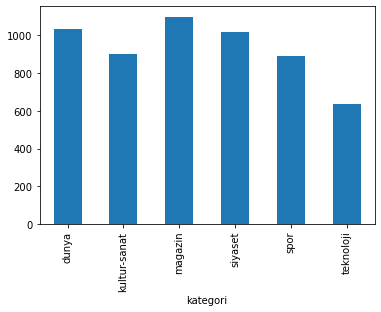

In [9]:
df.groupby('kategori').kategori_id.count().plot.bar(ylim=0)

In [10]:
df.head()

,kategori,icerik,kategori_id
0,magazin,sapiğin bi̇le gurursuzu bana denk geldi̇ ece e...,0
1,magazin,çekim dönüşü kenan i̇mirzalıoğlu geçtiğimiz ak...,0
2,magazin,paylaştığı fotoğraf twitter'da olay oldu victo...,0
3,magazin,daniştay 5 daki̇ka sevi̇şmeyi̇ uzun buldu danı...,0
4,magazin,yağmur emre dudak dudağa kanal d'nin yeni yıld...,0


In [11]:
X = df["icerik"]
y = df["kategori_id"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB()),
                     ])

In [18]:
text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

0.8680065181966322

In [19]:
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       393
           1       0.82      0.90      0.86       340
           2       0.97      0.92      0.95       292
           3       0.83      0.92      0.88       327
           4       0.85      0.83      0.84       299
           5       0.97      0.68      0.80       190

    accuracy                           0.87      1841
   macro avg       0.88      0.85      0.86      1841
weighted avg       0.87      0.87      0.87      1841



In [20]:
from sklearn.externals import joblib
joblib.dump(text_clf, "NB_gazete_model.pkl")

c:\users\hasan\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['NB_gazete_model.pkl']

In [21]:
NB_gazete_model = open("NB_gazete_model.pkl","rb")
model = joblib.load(NB_gazete_model)

In [22]:
text = """aptığı ve düzenlediği yardımlarla sık sık konuşulan Haluk Levent, Twitter hesabından, "Bir bayram günü kostümü! Bayramınız kutlu olsun" ifadeleriyle hem Ramazan Bayramını kutladı hem de geçmiş yıllara ait bir fotoğrafını paylaştı. Levent'in takipçilerinin büyük ilgi gösterdiği fotoğraf yaklaşık 55 bin beğeni alırken, Haluk Levent'e yanıt türkücü Mahsun Kırmızıgül'den geldi.
Yıllar öncesine ait albüm fotoğraflarını Twitter'dan paylaşan Mahsun Kırmızıgül, "Alem yakışıklı görsün. @haluklevent senden daha beterleri var. Bu resimler çekildiğinde ilk heyecanları yaşıyorduk. Hey gidi günler hey" ifadelerini kullandı.
"""
data = [text]
print(model.predict(data))

[0]


In [28]:
text1 = """Wesley Sneijder Galatasaray'a yardımcı antrenör olarak geri dönüyor
Galatasaray'da Hasan Şaş'ın istifasının ardından boşalan yardımcı antrenörlük görevine sarı kırmızılıların eski yıldızı Wesley Sneijder'in getirileceği iddia edildi.
"""
data = [text1]
print(model.predict(data))

[2]


In [32]:
text2 = """Avrupa'da salgınının en son ulaştığı ülke olan Karadağ'da koronavirüs vakası kalmadı
Dünya genelinde yeni tip koronavirüs salgınında hayatını kaybedenlerin sayısı 345 bini aşarken, iyileşen sayısı da 2 milyon 290 bine yaklaştı. Avrupa'da salgınının en son ulaştığı ülke olan Karadağ'da ise aktif vaka kalmadı."""

data = [text2]

print(model.predict(data))

[1]
